In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup


In [2]:
stack_train = pd.read_csv("/Users/yixuanwang/Desktop/ucb_21/IEOR_142/hw4/stack_stats_2020_train2.csv") # already a data frame
stack_test = pd.read_csv("/Users/yixuanwang/Desktop/ucb_21/IEOR_142/hw4/stack_stats_2020_test2.csv")
stack_train.info()
stack_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19247 entries, 0 to 19246
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      19247 non-null  int64 
 1   Score   19247 non-null  int64 
 2   Body    19247 non-null  object
 3   Title   19247 non-null  object
 4   Tags    19247 non-null  object
dtypes: int64(2), object(3)
memory usage: 752.0+ KB


,Id,Score,Body,Title,Tags
0,475417,5,<p>I often hear that in a longitudinal multi-l...,Are time points nested in students or crossed ...,<r><mixed-model><lme4-nlme><repeated-measures>...
1,454969,1,<p>I have a normally distributed dataset and a...,Find confidence level given a confidence interval,<r><probability><normal-distribution><confiden...
2,475651,0,<p>I have created a random forest to classify ...,Random Forest Classifier bound to a specific t...,<random-forest><feature-selection><error>
3,474736,0,<p>I have some issues with my linear differenc...,"How to back transform ln + 1 or log10 + 1, and...",<regression><logistic><multiple-regression><lo...
4,471570,1,<p>I have created a mixed model to model the n...,Interpret dotplot in mixed model,<r><regression><multilevel-analysis><model>


In [3]:
stack_test

,Id,Score,Body,Title,Tags
0,501467,2,<p>So my problem is this:\nI have a toleranced...,Probability that two Parts selected from a Nor...,<probability><normal-distribution>
1,443609,1,<p>Let <strong>x</strong> and <strong>y</stron...,Expected value of product of 2 correlated rand...,<random-vector>
2,454571,1,<p>I want to compare the model fitting propert...,How to compare Random Forest and Gaussian Proc...,<random-forest><gaussian-process><fitting><mod...
3,463464,0,"<p>I do not understand the assumption 1,2,⋯ ar...",Why Asymptotic Equipartition Property theorem ...,<mathematical-statistics><markov-process><info...
4,493759,0,<p>Target encoding (aka mean or categorical en...,Target encoding categorical variables when pop...,<categorical-data><predictive-models><categori...
...,...,...,...,...,...
8244,464503,1,<p>I have collected bond yield data from 01/01...,Analyzing the impact on non standard monetary ...,<least-squares><econometrics><panel-data>
8245,495508,1,"<p>In a population of 10000 people, there is a...",Accepting null hypothesis given specificity,<bayesian><p-value>
8246,455048,0,"<p><a href=""https://i.stack.imgur.com/P7Q1v.pn...",Multicolinearity in logistic regression using ...,<regression><logistic><multicollinearity>
8247,478353,2,<p>I conduct a staggered difference-in-differe...,Difference-in-Differences time-variant control...,<difference-in-difference>


In [4]:
stack_train_drop = stack_train.drop(['Id','Score'], axis = 1)
stack_train_drop

,Body,Title,Tags
0,<p>I often hear that in a longitudinal multi-l...,Are time points nested in students or crossed ...,<r><mixed-model><lme4-nlme><repeated-measures>...
1,<p>I have a normally distributed dataset and a...,Find confidence level given a confidence interval,<r><probability><normal-distribution><confiden...
2,<p>I have created a random forest to classify ...,Random Forest Classifier bound to a specific t...,<random-forest><feature-selection><error>
3,<p>I have some issues with my linear differenc...,"How to back transform ln + 1 or log10 + 1, and...",<regression><logistic><multiple-regression><lo...
4,<p>I have created a mixed model to model the n...,Interpret dotplot in mixed model,<r><regression><multilevel-analysis><model>
...,...,...,...
19242,"<p>I've read the post <a href=""https://stats.s...",Doubt about the formula for “The on-policy dis...,<machine-learning><distributions><reinforcemen...
19243,<p>I am doing a study on <strong>three groups<...,Which statistical model should I use to my thr...,<regression><anova>
19244,<p>Is there a neural network that can take dat...,Neural networks for domain/style transformation?,<neural-networks><data-transformation><domain-...
19245,<p>I am testing the following models. Volumes ...,What to report when p-values of Standardized a...,<statistical-significance><multiple-regression...


## BeautifulSoup

In [5]:
# df['Body'].apply(func)

Body_soup = stack_train_drop['Body'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())
Title_soup = stack_train_drop['Title'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

## Lowercase

In [6]:
Body_lowercase = Body_soup.str.lower()
Title_lowercase = Title_soup.str.lower()

### Remove Punctuation

In [7]:
# remove tag's punctuation
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [8]:
#remove <> in tags
Tags_remove_punc = stack_train_drop['Tags'].apply(remove_punctuation)

In [9]:
Tags_remove_punc[100]

'rmixedmodelgeneralizedadditivemodelmgcv'

In [10]:
#remove \n - linebreaks in Body and Title 
#remove <p> in Body column

Body_remove_punc = Body_lowercase.str.replace("\n", "").str.replace("<p>","").str.replace("</p>","")
Title_remove_punc = Title_lowercase.str.replace("\n", "")
Tags_remove_punc = Tags_remove_punc.str.replace("><", "")

In [11]:
Tags_remove_punc

0        rmixedmodellme4nlmerepeatedmeasuresmultilevela...
1         rprobabilitynormaldistributionconfidenceinterval
2                        randomforestfeatureselectionerror
3        regressionlogisticmultipleregressionlogarithmd...
4                       rregressionmultilevelanalysismodel
                               ...                        
19242    machinelearningdistributionsreinforcementlearning
19243                                      regressionanova
19244     neuralnetworksdatatransformationdomainadaptation
19245    statisticalsignificancemultipleregressionpvalu...
19246                     outliersdistanceanomalydetection
Name: Tags, Length: 19247, dtype: object

In [12]:
Body_remove_punc[1]

'i have a normally distributed dataset and an associated systematic error. i want to know the probability a measured value falls within this error range. so i think the i want to find the confidence level given a confidence interval on a normally distributed curve. i understand you would normally find a confidence interval given a confidence level but i cannot seem to find any pieces of code which work in the opposite direction.any advice is appreciated!'

### Remove Digit

In [13]:
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

In [14]:
Body_no_digit = Body_remove_punc.apply(remove_digit)
Title_no_digit = Title_remove_punc.apply(remove_digit)
Tags_no_digit = Tags_remove_punc.apply(remove_digit)


### Further Cleaning - nltk

In [15]:
#Tokenization

import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yixuanwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenization 

In [16]:
from nltk.tokenize import word_tokenize

Body_tokenize = Body_no_digit.apply(word_tokenize)
Title_tokenize = Title_no_digit.apply(word_tokenize)
Tags_tokenize = Tags_no_digit.apply(word_tokenize)


In [17]:
Body_tokenize

0        [i, often, hear, that, in, a, longitudinal, mu...
1        [i, have, a, normally, distributed, dataset, a...
2        [i, have, created, a, random, forest, to, clas...
3        [i, have, some, issues, with, my, linear, diff...
4        [i, have, created, a, mixed, model, to, model,...
                               ...                        
19242    [i, 've, read, the, post, how, deriving, the, ...
19243    [i, am, doing, a, study, on, three, groups, of...
19244    [is, there, a, neural, network, that, can, tak...
19245    [i, am, testing, the, following, models, ., vo...
19246    [mahalanobis, distance, provides, a, value, th...
Name: Body, Length: 19247, dtype: object

In [18]:
Title_tokenize

0        [are, time, points, nested, in, students, or, ...
1        [find, confidence, level, given, a, confidence...
2        [random, forest, classifier, bound, to, a, spe...
3        [how, to, back, transform, ln, +, or, log, +, ...
4                   [interpret, dotplot, in, mixed, model]
                               ...                        
19242    [doubt, about, the, formula, for, “, the, on-p...
19243    [which, statistical, model, should, i, use, to...
19244    [neural, networks, for, domain/style, transfor...
19245    [what, to, report, when, p-values, of, standar...
19246    [direction, of, outlier, detected, by, the, ma...
Name: Title, Length: 19247, dtype: object

In [19]:
Tags_tokenize

0        [rmixedmodellmenlmerepeatedmeasuresmultilevela...
1        [rprobabilitynormaldistributionconfidenceinter...
2                      [randomforestfeatureselectionerror]
3        [regressionlogisticmultipleregressionlogarithm...
4                     [rregressionmultilevelanalysismodel]
                               ...                        
19242    [machinelearningdistributionsreinforcementlear...
19243                                    [regressionanova]
19244    [neuralnetworksdatatransformationdomainadaptat...
19245    [statisticalsignificancemultipleregressionpval...
19246                   [outliersdistanceanomalydetection]
Name: Tags, Length: 19247, dtype: object

### Remove Stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yixuanwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [23]:
Body_remove_stopwords = Body_tokenize.apply(remove_stopwords)
Title_remove_stopwords = Title_tokenize.apply(remove_stopwords)
Tags_remove_stopwords = Tags_tokenize.apply(remove_stopwords)


In [24]:
Body_remove_stopwords

0        [often, hear, longitudinal, multi-level, analy...
1        [normally, distributed, dataset, associated, s...
2        [created, random, forest, classify, dataset, v...
3        [issues, linear, difference-in-difference, ana...
4        [created, mixed, model, model, number, jobs, d...
                               ...                        
19242    ['ve, read, post, deriving, formula, ``, on-po...
19243    [study, three, groups, students, different, he...
19244    [neural, network, take, data, one, distributio...
19245    [testing, following, models, ., volumes, purpo...
19246    [mahalanobis, distance, provides, value, might...
Name: Body, Length: 19247, dtype: object

In [25]:
Title_remove_stopwords

0        [time, points, nested, students, crossed, long...
1        [find, confidence, level, given, confidence, i...
2        [random, forest, classifier, bound, specific, ...
3        [back, transform, ln, +, log, +, ,, interpret,...
4                       [interpret, dotplot, mixed, model]
                               ...                        
19242    [doubt, formula, “, on-policy, distribution, e...
19243    [statistical, model, use, three, groups, ten, ...
19244    [neural, networks, domain/style, transformatio...
19245    [report, p-values, standardized, unstandardize...
19246    [direction, outlier, detected, mahalanobis, di...
Name: Title, Length: 19247, dtype: object

In [26]:
Tags_remove_stopwords

0        [rmixedmodellmenlmerepeatedmeasuresmultilevela...
1        [rprobabilitynormaldistributionconfidenceinter...
2                      [randomforestfeatureselectionerror]
3        [regressionlogisticmultipleregressionlogarithm...
4                     [rregressionmultilevelanalysismodel]
                               ...                        
19242    [machinelearningdistributionsreinforcementlear...
19243                                    [regressionanova]
19244    [neuralnetworksdatatransformationdomainadaptat...
19245    [statisticalsignificancemultipleregressionpval...
19246                   [outliersdistanceanomalydetection]
Name: Tags, Length: 19247, dtype: object

### Stemming

In [27]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [28]:
Body_stemming = Body_remove_stopwords.apply(stemmer)
Title_stemming = Title_remove_stopwords.apply(stemmer)
Tags_stemming = Tags_remove_stopwords.apply(stemmer)


In [29]:
Body_stemming

0        [often, hear, longitudin, multi-level, analysi...
1        [normal, distribut, dataset, associ, systemat,...
2        [creat, random, forest, classifi, dataset, var...
3        [issu, linear, difference-in-differ, analys, ....
4        [creat, mix, model, model, number, job, differ...
                               ...                        
19242    ['ve, read, post, deriv, formula, ``, on-polic...
19243    [studi, three, group, student, differ, hear, l...
19244    [neural, network, take, data, one, distribut, ...
19245    [test, follow, model, ., volum, purpos, log, t...
19246    [mahalanobi, distanc, provid, valu, might, use...
Name: Body, Length: 19247, dtype: object

In [30]:
Title_stemming

0        [time, point, nest, student, cross, longitudin...
1             [find, confid, level, given, confid, interv]
2        [random, forest, classifi, bound, specif, type...
3        [back, transform, ln, +, log, +, ,, interpret,...
4                         [interpret, dotplot, mix, model]
                               ...                        
19242    [doubt, formula, “, on-polici, distribut, epis...
19243    [statist, model, use, three, group, ten, parti...
19244         [neural, network, domain/styl, transform, ?]
19245    [report, p-valu, standard, unstandard, beta, d...
19246       [direct, outlier, detect, mahalanobi, distanc]
Name: Title, Length: 19247, dtype: object

In [31]:
Tags_stemming

0        [rmixedmodellmenlmerepeatedmeasuresmultilevela...
1         [rprobabilitynormaldistributionconfidenceinterv]
2                      [randomforestfeatureselectionerror]
3        [regressionlogisticmultipleregressionlogarithm...
4                     [rregressionmultilevelanalysismodel]
                               ...                        
19242     [machinelearningdistributionsreinforcementlearn]
19243                                    [regressionanova]
19244        [neuralnetworksdatatransformationdomainadapt]
19245    [statisticalsignificancemultipleregressionpval...
19246                      [outliersdistanceanomalydetect]
Name: Tags, Length: 19247, dtype: object

### Detokenization

In [32]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

Body_detokenized = Body_stemming.apply(TreebankWordDetokenizer().detokenize)
Title_detokenized = Title_stemming.apply(TreebankWordDetokenizer().detokenize)
Tags_detokenized = Tags_stemming.apply(TreebankWordDetokenizer().detokenize)


In [33]:
Body_detokenized

0        often hear longitudin multi-level analysi, tim...
1        normal distribut dataset associ systemat error...
2        creat random forest classifi dataset variabl s...
3        issu linear difference-in-differ analys . outc...
4        creat mix model model number job differ region...
                               ...                        
19242    've read post deriv formula``on-polici distrib...
19243    studi three group student differ hear languag ...
19244    neural network take data one distribut transfo...
19245    test follow model . volum purpos log transform...
19246    mahalanobi distanc provid valu might use detec...
Name: Body, Length: 19247, dtype: object

In [34]:
Title_detokenized

0        time point nest student cross longitudin multi...
1                    find confid level given confid interv
2        random forest classifi bound specif type miscl...
3             back transform ln + log +, interpret result?
4                              interpret dotplot mix model
                               ...                        
19242    doubt formula “ on-polici distribut episod task ”
19243    statist model use three group ten particip res...
19244                neural network domain/styl transform?
19245      report p-valu standard unstandard beta disagre?
19246             direct outlier detect mahalanobi distanc
Name: Title, Length: 19247, dtype: object

In [35]:
Tags_detokenized

0        rmixedmodellmenlmerepeatedmeasuresmultilevelan...
1           rprobabilitynormaldistributionconfidenceinterv
2                        randomforestfeatureselectionerror
3        regressionlogisticmultipleregressionlogarithmd...
4                       rregressionmultilevelanalysismodel
                               ...                        
19242       machinelearningdistributionsreinforcementlearn
19243                                      regressionanova
19244          neuralnetworksdatatransformationdomainadapt
19245    statisticalsignificancemultipleregressionpvalu...
19246                        outliersdistanceanomalydetect
Name: Tags, Length: 19247, dtype: object

✅✅✅

### Document-term Matrix

### Body dtm

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

Body_dtm = countvec.fit_transform(Body_detokenized)
Body_dtm

<19247x53967 sparse matrix of type '<class 'numpy.int64'>'
	with 1041126 stored elements in Compressed Sparse Row format>

In [37]:
Body_dtm = pd.DataFrame(Body_dtm.toarray(), columns=countvec.get_feature_names(), index=stack_train.index)
Body_dtm

,__,___,____,_____,_______,________,_________,___________,___________________,_____________________________________,...,退热药,防疫,隐形眼镜,预约,餐巾纸,ﬁnalconvolut,ﬁnd,ﬁve,ﬁxed,𝛘crit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Body_frequencies = Body_dtm.sum().sort_values(ascending=False)
Body_frequencies.head

<bound method NDFrame.head of model           23010
data            21965
use             20561
variabl         13063
valu            12457
                ...  
kernel_initi        1
survtime            1
survtest_c_v        1
survn               1
𝛘crit               1
Length: 53967, dtype: int64>

In [39]:
countvec1 = CountVectorizer(min_df = 0.1)
Body_dtm = countvec1.fit_transform(Body_detokenized)
Body_dtm = pd.DataFrame(Body_dtm.toarray(), columns=countvec1.get_feature_names(), index=stack_train.index)
Body_frequencies = Body_dtm.sum().sort_values(ascending=False)
Body_frequencies

model      23010
data       21965
use        20561
variabl    13063
valu       12457
           ...  
assum       2611
take        2552
possibl     2520
sinc        2420
sure        2283
Length: 75, dtype: int64

### Title dtm

In [40]:
countvec = CountVectorizer()
Title_dtm = countvec.fit_transform(Title_detokenized)
Title_dtm

<19247x6635 sparse matrix of type '<class 'numpy.int64'>'
	with 116641 stored elements in Compressed Sparse Row format>

In [41]:
Title_dtm = pd.DataFrame(Title_dtm.toarray(), columns=countvec.get_feature_names(), index=stack_train_drop.index)
Title_dtm

,_d,_i,_j,_n,_t,_x,a_,a_i,a_n,aalen,...,zt,zyl,β_,βd,ε_i,ηg,ϵ_i,ϵ_t,сonfid,ﬁnd
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Title_frequencies = Title_dtm.sum().sort_values(ascending=False)
Title_frequencies.head

<bound method NDFrame.head of model        2877
regress      2050
use          1899
test         1896
data         1796
             ... 
monolingu       1
money           1
momentari       1
molecul         1
_d              1
Length: 6635, dtype: int64>

In [43]:
countvec2 = CountVectorizer(min_df = 0.05)
Title_dtm = countvec2.fit_transform(Title_detokenized)
Title_dtm = pd.DataFrame(Title_dtm.toarray(), columns=countvec2.get_feature_names(), index=stack_train.index)
Title_frequencies = Title_dtm.sum().sort_values(ascending=False)
Title_frequencies

model        2877
regress      2050
use          1899
test         1896
data         1796
variabl      1774
distribut    1632
differ       1285
sampl        1096
time         1091
dtype: int64

### Tags dtm

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
Tags_dtm = countvec.fit_transform(Tags_detokenized)
Tags_dtm

<19247x16058 sparse matrix of type '<class 'numpy.int64'>'
	with 19224 stored elements in Compressed Sparse Row format>

In [45]:
Tags_dtm = pd.DataFrame(Tags_dtm.toarray(), columns=countvec.get_feature_names(), index=stack_train.index)
Tags_dtm

,abtest,abtestmultiarmedbandit,accuraci,accuracyconfusionmatrixcohenskappa,accuracyexponentialsmoothingmap,accuracysyntheticdata,acfpacf,adaboost,adjust,adjustmentblockingblup,...,zeroinfl,zeroinflationcontrollingforavari,zeroinflationglmmtmb,zeroinflationglmmtmbdispers,zeroinflationpermutationtest,zeroinflationprobit,zipf,zscore,zscoredependentvari,ztestsubset
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Tags_frequencies = Tags_dtm.sum().sort_values(ascending=False)
Tags_frequencies.head

<bound method NDFrame.head of regress                                                          76
probabl                                                          76
hypothesistest                                                   51
machinelearningneuralnetwork                                     49
machinelearn                                                     47
                                                                 ..
regressioncorrelationrsquar                                       1
regressioncorrelationregressioncoefficientsscikitlearn            1
regressioncorrelationregressioncoefficientsdescriptivestatist     1
regressioncorrelationpythonimageprocessingscipi                   1
abtest                                                            1
Length: 16058, dtype: int64>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

countvec3 = CountVectorizer(min_df = 0.001)

Tags_dtm = countvec3.fit_transform(Tags_detokenized)
Tags_dtm = pd.DataFrame(Tags_dtm.toarray(), columns=countvec3.get_feature_names(), index=stack_train.index)
Tags_frequencies = Tags_dtm.sum().sort_values(ascending=False)
Tags_frequencies

regress                            76
probabl                            76
hypothesistest                     51
machinelearningneuralnetwork       49
machinelearn                       47
neuralnetwork                      38
timeseri                           37
rregress                           32
pca                                28
correl                             27
probabilitydistribut               26
statisticalsignific                23
confidenceinterv                   22
rmixedmodellmenlm                  21
probabilityselfstudi               20
neuralnetworksconvneuralnetwork    20
dtype: int64

### Add postfix for each column

In [48]:
Body_dtm_postfix = Body_dtm.add_suffix('_Body')

In [49]:
Title_dtm_postfix = Title_dtm.add_suffix('_Title')

In [50]:
Tags_dtm_postfix = Tags_dtm.add_suffix('_Tags')

In [51]:
train_concat3 = pd.concat([Body_dtm_postfix, Title_dtm_postfix, Tags_dtm_postfix], axis=1) 

In [52]:
train_concat3

,also_Body,assum_Body,calcul_Body,case_Body,compar_Body,correct_Body,could_Body,data_Body,dataset_Body,differ_Body,...,neuralnetworksconvneuralnetwork_Tags,pca_Tags,probabilitydistribut_Tags,probabilityselfstudi_Tags,probabl_Tags,regress_Tags,rmixedmodellmenlm_Tags,rregress_Tags,statisticalsignific_Tags,timeseri_Tags
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,14,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# reset score column in train set
stack_train['Useful'] = (stack_train['Score'] >= 1).astype('int32').astype('object')
train_useful = stack_train['Useful']
# And remove the old "Score" column - we won't use it anymore
stack_train.drop(columns=['Score'], inplace=True)
stack_train.head()

,Id,Body,Title,Tags,Useful
0,475417,<p>I often hear that in a longitudinal multi-l...,Are time points nested in students or crossed ...,<r><mixed-model><lme4-nlme><repeated-measures>...,1
1,454969,<p>I have a normally distributed dataset and a...,Find confidence level given a confidence interval,<r><probability><normal-distribution><confiden...,1
2,475651,<p>I have created a random forest to classify ...,Random Forest Classifier bound to a specific t...,<random-forest><feature-selection><error>,0
3,474736,<p>I have some issues with my linear differenc...,"How to back transform ln + 1 or log10 + 1, and...",<regression><logistic><multiple-regression><lo...,0
4,471570,<p>I have created a mixed model to model the n...,Interpret dotplot in mixed model,<r><regression><multilevel-analysis><model>,1


## Clean the test set

In [54]:
stack_test_drop = stack_test.drop(['Id','Score'], axis = 1)
#Beautiful Soup
Body_soup_test = stack_test_drop['Body'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())
Title_soup_test = stack_test_drop['Title'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())


In [55]:
#lowercase
Body_lowercase_test = Body_soup_test.str.lower()
Title_lowercase_test = Title_soup_test.str.lower()



In [56]:
#Remove punctuation
    #remove <> in tags
Tags_remove_punc_test = stack_test_drop['Tags'].apply(remove_punctuation)
    #remove \n - linebreaks in Body and Title 
    #remove <p> in Body column
Body_remove_punc_test = Body_lowercase_test.str.replace("\n", "").str.replace("<p>","").str.replace("</p>","")
Title_remove_punc_test = Title_lowercase_test.str.replace("\n", "")
Tags_remove_punc_test = Tags_remove_punc_test.str.replace("><", "")


In [57]:
#Remove digit
Body_no_digit_test = Body_remove_punc_test.apply(remove_digit)
Title_no_digit_test = Title_remove_punc_test.apply(remove_digit)
Tags_no_digit_test = Tags_remove_punc_test.apply(remove_digit)

In [58]:
#Tokenization
Body_tokenize_test = Body_no_digit_test.apply(word_tokenize)
Title_tokenize_test = Title_no_digit_test.apply(word_tokenize)
Tags_tokenize_test = Tags_no_digit_test.apply(word_tokenize)

In [59]:
#Remove Stopwords
Body_remove_stopwords_test = Body_tokenize_test.apply(remove_stopwords)
Title_remove_stopwords_test = Title_tokenize_test.apply(remove_stopwords)
Tags_remove_stopwords_test = Tags_tokenize_test.apply(remove_stopwords)
Body_remove_stopwords_test

0       [problem, :, toleranced, part, nominal, length...
1       [let, x, complex, gaussian, random, vectors, l...
2       [want, compare, model, fitting, properties, ra...
3       [understand, assumption, ,, ,⋯, i.i.d, ., ~p, ...
4       [target, encoding, (, aka, mean, categorical, ...
                              ...                        
8244    [collected, bond, yield, data, //, :, //, seve...
8245    [population, people, ,, %, chance, someone, ca...
8246    [ran, multiple, logistic, regression, model, (...
8247    [conduct, staggered, difference-in-differences...
8248    [x, discrete, distribution, support, $, x, ,, ...
Name: Body, Length: 8249, dtype: object

In [60]:
#Stemming
Body_stemming_test = Body_remove_stopwords_test.apply(stemmer)
Title_stemming_test = Title_remove_stopwords_test.apply(stemmer)
Tags_stemming_test = Tags_remove_stopwords_test.apply(stemmer)
Body_stemming_test

0       [problem, :, toleranc, part, nomin, length, mm...
1       [let, x, complex, gaussian, random, vector, le...
2       [want, compar, model, fit, properti, random, f...
3       [understand, assumpt, ,, ,⋯, i.i.d, ., ~p, (, ...
4       [target, encod, (, aka, mean, categor, encod, ...
                              ...                        
8244    [collect, bond, yield, data, //, :, //, sever,...
8245    [popul, peopl, ,, %, chanc, someon, cancer, .,...
8246    [ran, multipl, logist, regress, model, (, seco...
8247    [conduct, stagger, difference-in-differ, analy...
8248    [x, discret, distribut, support, $, x, ,, x, ,...
Name: Body, Length: 8249, dtype: object

In [61]:
#Detokenization
Body_detokenized_test = Body_stemming_test.apply(TreebankWordDetokenizer().detokenize)
Title_detokenized_test = Title_stemming_test.apply(TreebankWordDetokenizer().detokenize)
Tags_detokenized_test = Tags_stemming_test.apply(TreebankWordDetokenizer().detokenize)

In [62]:
#Document-term Matrix
from sklearn.feature_extraction.text import CountVectorizer

# Body
countvec = CountVectorizer()
Body_dtm_test = countvec.fit_transform(Body_detokenized_test)
Body_dtm_test


<8249x30630 sparse matrix of type '<class 'numpy.int64'>'
	with 447384 stored elements in Compressed Sparse Row format>

In [63]:
Body_dtm_test = pd.DataFrame(Body_dtm_test.toarray(), columns=countvec.get_feature_names(), index=stack_test.index)
Body_dtm_test

,__,____,_____,______,_______,________,_________,__________,_________________________________________________________________,__________________________________________________________________________________________________concatenate_,...,ϑo,ϕhing,ϕlogist,ϵcan,ϵii,ϵiwher,ϵx,ﬁnd,ﬁrst,ﬁt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Body_frequencies_test = Body_dtm_test.sum().sort_values(ascending=False)
Body_frequencies_test

model         10180
data           9281
use            8839
variabl        5566
valu           5243
              ...  
infinities        1
slopehowev        1
infinitely        1
slopein           1
mayn              1
Length: 30630, dtype: int64

In [65]:
countvec1_test = CountVectorizer(min_df = 0.1)
Body_dtm_test = countvec1_test.fit_transform(Body_detokenized_test)
Body_dtm_test = pd.DataFrame(Body_dtm_test.toarray(), columns=countvec1_test.get_feature_names(), index=stack_test.index)
Body_frequencies_test = Body_dtm_test.sum().sort_values(ascending=False)
Body_frequencies_test

model      10180
data        9281
use         8839
variabl     5566
valu        5243
           ...  
assum       1149
take        1118
sinc        1111
possibl     1066
base        1026
Length: 74, dtype: int64

In [66]:
countvec2_test = CountVectorizer(min_df = 0.05)
Title_dtm_test = countvec2_test.fit_transform(Title_detokenized_test)
Title_dtm_test = pd.DataFrame(Title_dtm_test.toarray(), columns=countvec2_test.get_feature_names(), index=stack_test.index)
Title_frequencies_test = Title_dtm_test.sum().sort_values(ascending=False)
Title_frequencies_test

model        1300
regress       911
use           817
test          806
data          778
variabl       775
distribut     680
differ        522
sampl         465
estim         460
linear        441
dtype: int64

In [67]:
countvec3_test = CountVectorizer(min_df = 0.001)
Tags_dtm_test = countvec3_test.fit_transform(Tags_detokenized_test)
Tags_dtm_test = pd.DataFrame(Tags_dtm_test.toarray(), columns=countvec3_test.get_feature_names(), index=stack_test.index)
Tags_frequencies_test = Tags_dtm_test.sum().sort_values(ascending=False)
Tags_frequencies_test

regress                         38
probabl                         31
neuralnetwork                   25
machinelearn                    25
hypothesistest                  23
timeseri                        22
machinelearningneuralnetwork    14
confidenceinterv                12
crossvalid                      12
bayesian                        12
rmixedmodellmenlm               12
rregress                        12
regressionmultipleregress       11
sampl                           11
ttest                           10
correl                           9
statisticalsignific              9
dtype: int64

In [68]:
#Add postfix for each column
Body_dtm_postfix_test = Body_dtm_test.add_suffix('_Body')
Title_dtm_postfix_test = Title_dtm_test.add_suffix('_Title')
Tags_dtm_postfix_test = Tags_dtm_test.add_suffix('_Tags')
#Concat test set
test_concat3 = pd.concat([Body_dtm_postfix_test, Title_dtm_postfix_test, Tags_dtm_postfix_test], axis=1) 
test_concat3

,also_Body,assum_Body,base_Body,calcul_Body,case_Body,compar_Body,correct_Body,could_Body,data_Body,dataset_Body,...,neuralnetwork_Tags,probabl_Tags,regress_Tags,regressionmultipleregress_Tags,rmixedmodellmenlm_Tags,rregress_Tags,sampl_Tags,statisticalsignific_Tags,timeseri_Tags,ttest_Tags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8245,1,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# reset score column in test set
stack_test['Useful'] = (stack_test['Score'] >= 1).astype('int32').astype('object')
test_useful = stack_test['Useful']
# And remove the old "Score" column - we won't use it anymore
stack_test.drop(columns=['Score'], inplace=True)
stack_test.head()

,Id,Body,Title,Tags,Useful
0,501467,<p>So my problem is this:\nI have a toleranced...,Probability that two Parts selected from a Nor...,<probability><normal-distribution>,1
1,443609,<p>Let <strong>x</strong> and <strong>y</stron...,Expected value of product of 2 correlated rand...,<random-vector>,1
2,454571,<p>I want to compare the model fitting propert...,How to compare Random Forest and Gaussian Proc...,<random-forest><gaussian-process><fitting><mod...,1
3,463464,"<p>I do not understand the assumption 1,2,⋯ ar...",Why Asymptotic Equipartition Property theorem ...,<mathematical-statistics><markov-process><info...,0
4,493759,<p>Target encoding (aka mean or categorical en...,Target encoding categorical variables when pop...,<categorical-data><predictive-models><categori...,0


## Final combination of matrix + score

In [70]:
#combine train
combine_matrix_score_train = pd.concat([Body_dtm_postfix, Title_dtm_postfix, Tags_dtm_postfix, train_useful], axis=1) 
#combine test
combine_matrix_score_test = pd.concat([Body_dtm_postfix_test, Title_dtm_postfix_test, Tags_dtm_postfix_test, test_useful], axis=1) 

## Part A - Clarification (Logic) of data cleaning part

### I perfomed a few steps throughout data cleaning:
1. BeautifulSoup to convert html to plain text for Body and Title columns
2. Turn to lowercase for Body and Title 
3. Remove punctuation for Tags
4. Remove frequent code for Body and Tags
5. Remove Digit for Body, Title and Tags
6. Tokenization
7. Remove Stopwords
8. Stemming 
9. Detokenization
10. Document-term Matrix

#### When perform vectorization, I was setting min_df = 0.05  for "Body column" and got 217 variables back, but it's way too large for my computer to build models in part b) in a timely manner. So that I changed "min_df = 0.05 to min_df = 0.1" for Body column and get 75 variables back. Though 0.1 would also work for Title and Tags, the reason of why I am not using min_df = 0.1 for them is that I would only get roughly 10 variables. 10 var is not enough for me to build accurate models in part b).


## Part b

In [84]:
X_train = train_concat3
X_test = test_concat3
y_train = pd.DataFrame(stack_train['Useful']).astype('int')
y_test = pd.DataFrame(stack_test['Useful']).astype('int')

In [85]:
train_cols = X_train.columns
test_cols = X_test.columns

train_not_test = train_cols.difference(test_cols)
train_not_test 

Index([], dtype='object')

In [86]:
test_not_in_train = test_cols.difference(train_cols)
test_not_in_train

Index([], dtype='object')

In [87]:
for i in train_not_test:
    X_test[i] = 0
X_test

,also_Body,assum_Body,base_Body,calcul_Body,case_Body,compar_Body,correct_Body,could_Body,data_Body,dataset_Body,...,statisticalsignific_Tags,timeseri_Tags,ttest_Tags,neuralnetworksconvneuralnetwork_Tags,pca_Tags,probabilitydistribut_Tags,probabilityselfstudi_Tags,run_Body,sure_Body,time_Title
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8245,1,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
for i in test_not_in_train:
    X_train[i] = 0
X_train   

,also_Body,assum_Body,calcul_Body,case_Body,compar_Body,correct_Body,could_Body,data_Body,dataset_Body,differ_Body,...,statisticalsignific_Tags,timeseri_Tags,base_Body,bayesian_Tags,crossvalid_Tags,estim_Title,linear_Title,regressionmultipleregress_Tags,sampl_Tags,ttest_Tags
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,14,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X_train.shape, X_test.shape

((19247, 109), (8249, 109))

In [90]:
y_train.shape, y_test.shape

((19247, 1), (8249, 1))

In [91]:
print(y_train.value_counts())
print(y_test.value_counts())

Useful
0         9737
1         9510
dtype: int64
Useful
0         4173
1         4076
dtype: int64


In [92]:
# Baseline accuracy
print('ACC', 4173/(4173 + 4076))

ACC 0.5058795005455207


### Decision Tree Classifier with CV

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

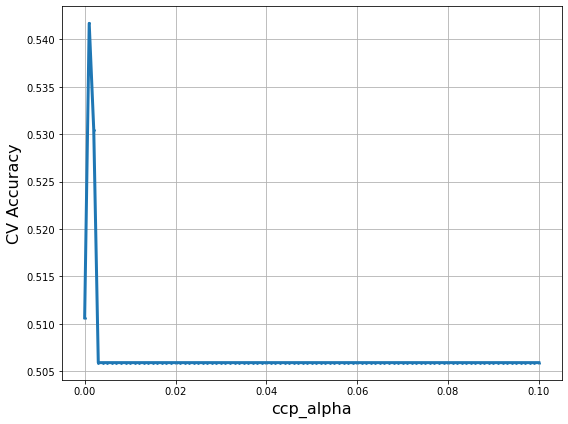

Best ccp_alpha {'ccp_alpha': 0.001}


In [96]:
import matplotlib.pyplot as plt
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 5


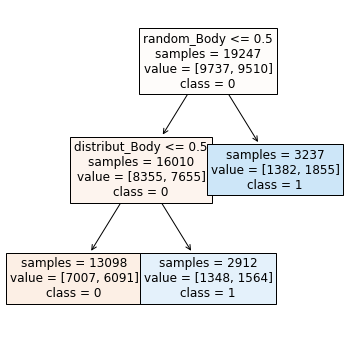

In [97]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2270 1903]
 [2211 1865]]

Accuracy: 0.5012728815614014


### Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

<ipython-input-99-393e8b4c230d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [100]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1840 2333]
 [1614 2462]]

Accuracy: 0.5215177597284519


### Random Forest Classifier with CV

In [137]:
import time

grid_values = {'max_features': np.linspace(1,120,120, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [10],
               'min_samples_split' : [40],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

time: 467.37 s


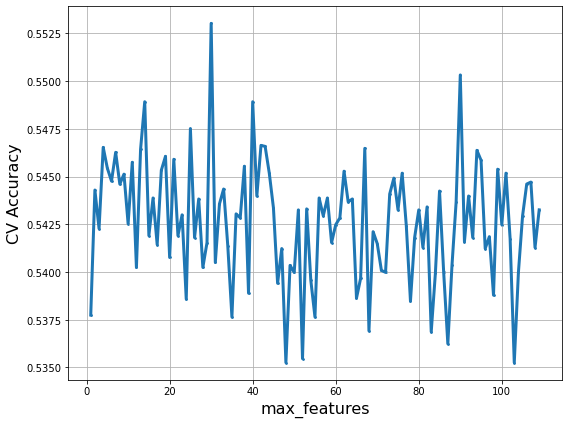

Best parameters {'max_features': 30, 'min_samples_leaf': 5, 'min_samples_split': 40, 'n_estimators': 10, 'random_state': 88}


In [105]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [106]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2006 2167]
 [1895 2181]]

Accuracy: 0.5075766759607225


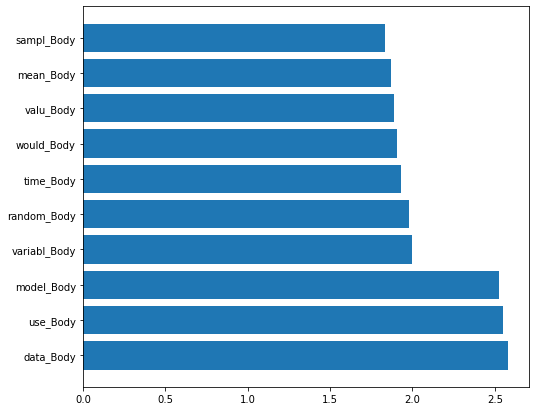

In [107]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [111]:
#Test set
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2261 1912]
 [2039 2037]]

Accuracy: 0.5210328524669657


In [110]:
# on the training set
y_prob = logreg.predict_proba(X_train)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_train.index)

cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[6373 3364]
 [4890 4620]]

Accuracy: 0.5711539460695173


In [112]:
#  CART on training set
y_pred = dtc_cv.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[7007 2730]
 [6091 3419]]

Accuracy: 0.5416948095807139


⤴️CART - Training set is quite similar to the Logistic Regression on the test set

### Gradient Boosting Classifier with CV

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'n_estimators': np.linspace(20, 40, 50, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.2],
               'max_leaf_nodes': np.linspace(5, 10, 8, dtype='int32'),
               'max_depth': [5],
               'min_samples_leaf': [40],
               'random_state': [88]} 

tic = time.time()
gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train, y_train)
toc = time.time()

print('time:', round(toc-tic, 2),'s')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

time: 2757.73 s


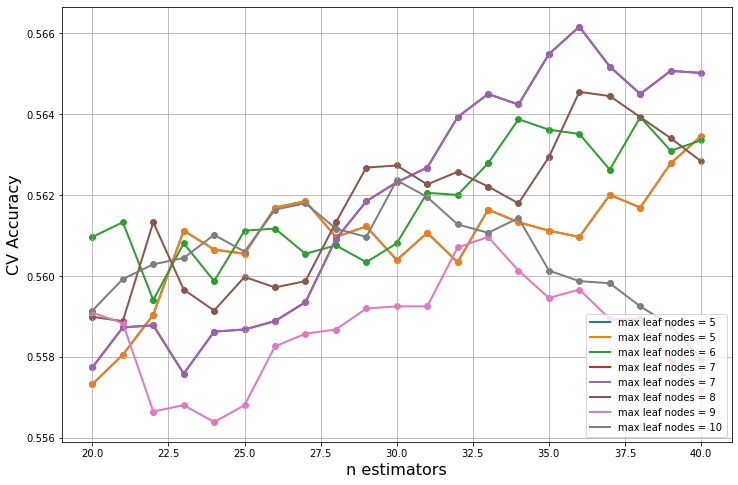

In [143]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
cv_acc_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [144]:
y_pred = gbc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1921 2252]
 [1730 2346]]

Accuracy: 0.5172748211904473


### LDA

In [167]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [168]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2267 1906]
 [2051 2025]]

Accuracy: 0.5203054915747364


### Bootstrap Validation

### 1) Accuracy

In [178]:
import time

def bootstrap_validation_accuracy(test_data, test_label, train_label, model, metrics_list, sample, random_state=88):
    #tic = time.time()
    n_sample = sample
    #n_metrics = len(metrics_list)
    output_array=[]

    for bs_iter in range(sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        bs_metrics = metrics_list(bs_predicted, bs_label, train_label)
        output_array.append(bs_metrics)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [179]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [180]:
def bs_accuracy(y_pred, y_test, y_train):
    return accuracy_score(y_test, y_pred)

In [181]:
bs_output = bootstrap_validation_accuracy(X_test,y_test,y_train,rf_cv,
                                 bs_accuracy,
                                 sample = 2500)

(-0.03, 0.01)

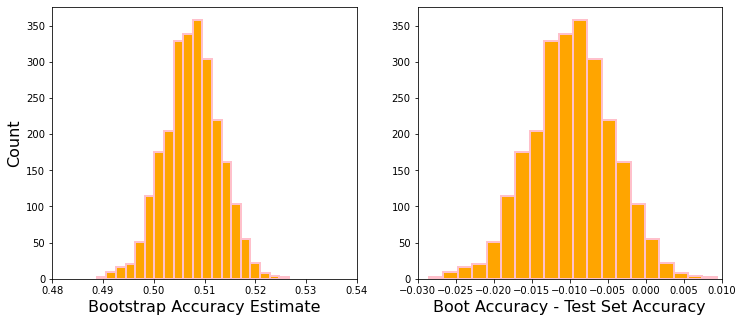

In [182]:
test_accuracy = bs_accuracy(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='pink', linewidth=2,color = "orange")
axs[0].set_xlim([0.48,0.54])
axs[1].hist(bs_output.iloc[:,0]-test_OSR2, bins=20,edgecolor='pink', linewidth=2,color = "orange")
axs[1].set_xlim([-0.03,0.01])

In [211]:
test_accuracy

0.5203054915747364

### 2) TPR

In [189]:
def bootstrap_tpr(y_pred, y_test, y_train):
    bootstrap_cm = confusion_matrix(y_test, y_pred)
    tpr_result = bootstrap_cm.ravel()[3] / (bootstrap_cm.ravel()[3] + bootstrap_cm.ravel()[2])
    return tpr_result

In [200]:
# TPR
def bootstrap_validation_tpr(test_data, test_label, train_label, model, metrics_list, sample, random_state=88):
    #tic = time.time()
    n_sample = sample
    #n_metrics = len(metrics_list)
    output_array=[]

    for bs_iter in range(sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        bs_metrics = metrics_list(bs_predicted, bs_label, train_label)
        output_array.append(bs_metrics)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [191]:
bs_output_tpr = bootstrap_validation_tpr(X_test,y_test,y_train,rf_cv,
                                 bootstrap_tpr,
                                 sample = 2500)

In [193]:
tpr_std = bs_output_tpr.std()
tpr_std

0    0.007761
dtype: float64

In [197]:
bs_output_tpr.head()

,0
0,0.533543
1,0.532662
2,0.543171
3,0.536133
4,0.527633


### 2) FPR

In [205]:
def bootstrap_FPR(y_pred, y_test, y_train):
    bootstrap_cm = confusion_matrix(y_test, y_pred)
    FPR_result = bootstrap_cm.ravel()[1] / (bootstrap_cm.ravel()[1] + bootstrap_cm.ravel()[0])
    return FPR_result

In [206]:
# FPR
def bootstrap_validation_FPR(test_data, test_label, train_label, model, metrics_list, sample, random_state=88):
    #tic = time.time()
    n_sample = sample
    #n_metrics = len(metrics_list)
    output_array=[]

    for bs_iter in range(sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        bs_metrics = metrics_list(bs_predicted, bs_label, train_label)
        output_array.append(bs_metrics)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [207]:
bs_output_FPR = bootstrap_validation_FPR(X_test,y_test,y_train,rf_cv,
                                 bootstrap_FPR,
                                 sample = 2500)

In [208]:
bs_output_FPR

,0
0,0.504988
1,0.516365
2,0.520679
3,0.508635
4,0.516631
...,...
2495,0.531510
2496,0.514327
2497,0.517331
2498,0.513487


In [209]:
FPR_std = bs_output_FPR.std()
FPR_std

0    0.007699
dtype: float64

In [210]:
bs_output_FPR.head()

,0
0,0.504988
1,0.516365
2,0.520679
3,0.508635
4,0.516631


### Part B  Report + Clarification

### Qs: Report on the details of your training procedures and final comparisons on the test set. Use your best judgment to choose a final model and explain your choice.

### Ans:
I choose Random Forest model.

#### - Training procedure:

Regarding the training procedure, I tried Decision Tree Classifier, Random Forest, Logistic Regression, Gradient Boosting and LDA. 

1. I first set up the traning set and test set into a good shape: ((19247, 109), (8249, 109)) | ((19247, 1), (8249, 1)). It takes me a while to append discrepent columns into the original-traning-matrix and test-traning-matrix and then concat them together.
2. Decision Tree classifier:
    I tune cv from 10-fold to 5-fold when I realized that it hasn't finished after 30-min waiting.
3. Random Forest Classifier: 
    I tune the min_sample leaf from 2 to 5, making sure that I would maintain accuracy as well as minimizing the running time.
4. Random Forest Classifier with CV:
    1) increase n_estimators from 2 to 5
    2) significantly increase 'min_samples_split' from 10 to 40 to accelerate the running time
5. Logistic Regression
    Did not tune too much on this model because random_state = 88 is accuracy enought for me to test on training set and test set.
6. Gradient Boosting Classifier with CV:
    setting parameter values in a similar approach as I did in "Random Forest Classifier with CV"
7. LDA
    Did not tune too much


#### - Final Test set comparison

Following are the accuracies(performance) that I have calculated for each model on test set:
1. Baseline: 0.5058
2. Decision Tree Classifier: 0.5013
3. Random Forest: 0.5215
4. Random Forest with CV: 0.5076
5. Logistic Regression: 0.5210
6. Gradient Boosting: 0.5173
7. LDA: 0.5203

#### - Bootstrap result on Random Forest
1. Accuracy: 0.5203
2. TPR: 0.0078
3. FPR: 0.0077

I tweak the parameter of Random Forest model in order to shorten the running time. Even though I simplify the model and make a tradeoff between complexity and accuracy, Random Forest model still performs the best accuracy among all of the models that I have built. Though I might change my opinion upon futher tuning the parameter to be more precise, I now will choose my final model as random forest model.

## Part C


### i) Think about how to select a model, among many different models, to best accomplish the goal of maximizing the probability that the top question is useful. Comment on the precise criteria that you would use (e.g., “I would select a model with the highest accuracy” or “I would select a model with the highest TPR”, etc.) and note that your answer may involve multiple performance metrics if you wish. Explain your response.

In my opinion, I think a model with highest accuracy and a model with the highest TPR would both serve our purpose. It would be better if we could weighted accuracy and TPR together to recoomend the first post. Essentially I would assign 50% weight to accuracy and 50% weight to TPR: 

"recommendation_rate = 0.5*accuracy + 0.5 * TPR". 

I will select whichever model has the highest "recommendation_rate".

## ii) 

According to the baseline accuracy, I see that roughly 4173/(4173 + 4076) = 50.6% ≈ 51% of the questions are useful. I can assume that if we follow the StackOverflow's on assigning most recently submitted questions, the probability that the top question is useful is 51%. 